# Central Limit Theorem Implementation Example in Iris Dataset


In [45]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
%matplotlib inline  

In [52]:
df = pd.read_csv("Iris.csv")    #reading the csv file

In [53]:
df.info()   #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.head(5)  # to print 5 rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df_sw = df['SepalWidthCm']
df_sw.describe()  #statstics of the SeptalWidthCm column

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

In [26]:
df_sw.mean()    #printing the mean of the Septal Width 

3.0540000000000007

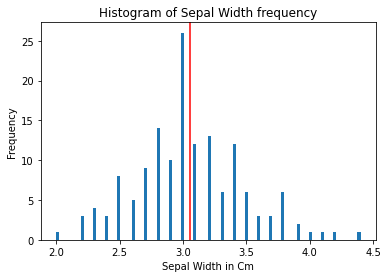

In [60]:
# plotting the SeptalWidthCm column to find frequency
plt.hist(df_sw, bins=100)
plt.xlabel('Sepal Width in Cm')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width frequency')
plt.axvline(x=df_sw.mean(),color='r')

From the above histogram we can see the vertical red line(mean of data) is almost at the centre of main distribution.
Most of the distribution is in normal but not 100%.


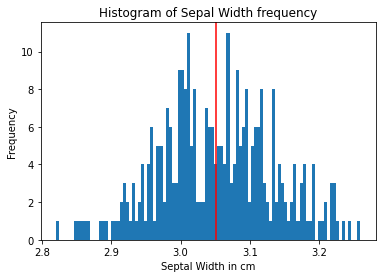

In [62]:
#We will take sample size=10, samples=300
#Calculate the arithmetice mean and plot the mean of sample 300 times

array = []
n = 300
for i in range(1,n):
    array.append(df_sw.sample(n=30,replace= True).mean())

#print(array)
plt.hist(array, bins=100)
plt.xlabel('Septal Width in cm')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width frequency')
plt.axvline(x=np.mean(array),color='r') 

1. The Mean Sample is  -0.016940 different the original mean for the Sepaal Width in cm. (for sample size=20)
2. The Mean Sample is  0.009157 different the original mean for the Sepaal Width in cm. (for sample size=60)
3. The Mean Sample is  0.001349 different the original mean for the Sepaal Width in cm. (for sample size=100)

	 The mean of the mean of the above three samples is -0.002145 diffrent from the original mean of the septalWidth from the dataset.



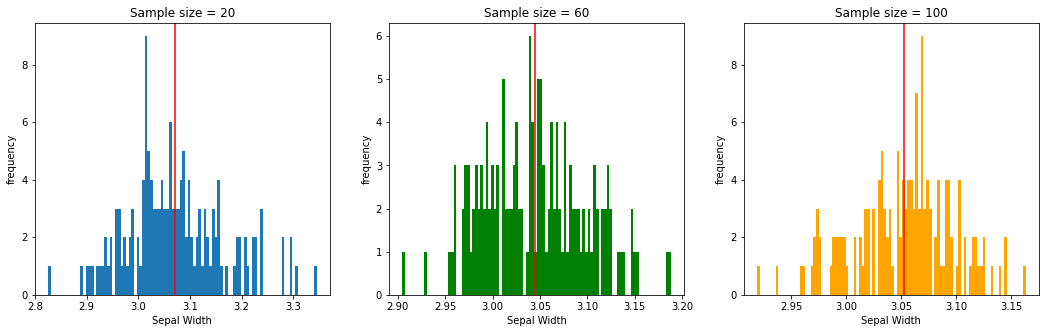

In [66]:
#Taking sample size=20, 60 & 100 samples=150
#Calculate the arithmetice mean and plot the mean of sample 

array1 = []
array2 = []
array3 = []
n = 150
for i in range(1,n):
    array1.append(df_sw.sample(n=20,replace= True).mean())
    array2.append(df_sw.sample(n=60,replace= True).mean())
    array3.append(df_sw.sample(n=100,replace= True).mean())

fig , (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(18,5))

#plt.subplot(311)
ax1.hist(array1, bins=100)
ax1.set_xlabel('Sepal Width')
ax1.set_ylabel('frequency')
ax1.set_title('Sample size = 20')
ax1.axvline(x=np.mean(array1),color='r') # for giving mean line

print('1. The Mean Sample is  %f different the original mean for the Sepaal Width in cm. (for sample size=20)' % (df_sw.mean() - pd.Series(array1).mean()))

#ax2.subplot(312)
ax2.hist(array2, bins=100, color='green')
ax2.set_xlabel('Sepal Width')
ax2.set_ylabel('frequency')
ax2.set_title('Sample size = 60')
ax2.axvline(x=np.mean(array2),color='r') 

print('2. The Mean Sample is  %f different the original mean for the Sepaal Width in cm. (for sample size=60)' % (df_sw.mean() - pd.Series(array2).mean()))

#ax3.subplot(313)
ax3.hist(array3, bins=100,color='orange')
ax3.set_xlabel('Sepal Width')
ax3.set_ylabel('frequency')
ax3.set_title('Sample size = 100')
ax3.axvline(x=np.mean(array3),color='r') 

print('3. The Mean Sample is  %f different the original mean for the Sepaal Width in cm. (for sample size=100)' % (df_sw.mean() - pd.Series(array3).mean()))


mean_of_samples= (np.mean(array1)+np.mean(array2)+np.mean(array3))/3
print("\n\t The mean of the mean of the above three samples is %f diffrent from the original mean of the septalWidth from the dataset.\n" %(df_sw.mean() - mean_of_samples))